## CMPINF 2100 Week 09

### Review PCA with the Sonar data set

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

Also import functions from sklearn.

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.decomposition import PCA

## Read data

In [4]:
sonar_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'

In [5]:
sonar_df = pd.read_csv( sonar_url, header=None )

In [6]:
sonar_df.shape

(208, 61)

In [7]:
sonar_df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

Let's rename the COLUMNS to show the following pattern:

X01, X02, X03 so and and so on.

In [8]:
sonar_df.columns = ['X%02d' % d for d in sonar_df.columns ]

In [9]:
sonar_df.columns

Index(['X00', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59',
       'X60'],
      dtype='object')

In [10]:
sonar_df.dtypes.value_counts()

float64    60
object      1
dtype: int64

In [11]:
sonar_df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X60     208 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


In [12]:
sonar_df.X60.value_counts()

M    111
R     97
Name: X60, dtype: int64

The numeric columns are HIGHLY correlated!!!

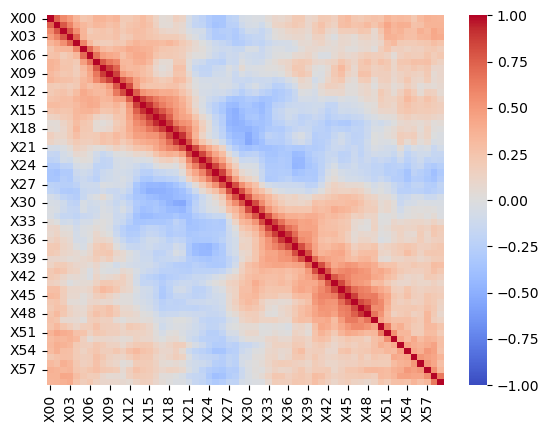

In [13]:
fig, ax = plt.subplots()

sns.heatmap( data = sonar_df.corr(numeric_only=True),
             vmin=-1, vmax=1, center=0,
             cmap='coolwarm',
             ax=ax)

plt.show()

PCA exploits correlation!!! 

PCA crafts or creates new variables based on correlated numeric columns!!!

## Extract or Select the numeric columns

In [14]:
sonar_features = sonar_df.select_dtypes('number').copy()

In [17]:
sonar_features.shape

(208, 60)

## Standardize the numeric features

In [15]:
Xsonar = StandardScaler().fit_transform( sonar_features )

In [16]:
Xsonar.shape

(208, 60)

## PCA

BUT...we will NOT use the same approach that we have used up to this point.

We will **NOT** specify the `n_components` argument to `PCA()`.

Let's see what happens if we use the DEFAULT arguments to `PCA()` meaning will NOT specify arugments when the PCA object is initialized!!!!

In [18]:
sonar_pca = PCA().fit_transform( Xsonar )

Check the shape...

In [19]:
sonar_pca.shape

(208, 60)

There are as many columns returned as the number of columns in the data!!!!

We have previously specified `n_components=2` just to support simple visualization.

But...PCA is capable of giving you MORE than just 2 new variables.

PCA creates as many NEW variables as there are in the original data!!!!!

In [20]:
type( sonar_pca )

numpy.ndarray

Convert `sonar_pca` to a DataFrame using the naming pattern:

pc01, pc02, pc03, etc...

In [21]:
['pc%02d' % d for d in range(1, sonar_pca.shape[1]+1)]

['pc01',
 'pc02',
 'pc03',
 'pc04',
 'pc05',
 'pc06',
 'pc07',
 'pc08',
 'pc09',
 'pc10',
 'pc11',
 'pc12',
 'pc13',
 'pc14',
 'pc15',
 'pc16',
 'pc17',
 'pc18',
 'pc19',
 'pc20',
 'pc21',
 'pc22',
 'pc23',
 'pc24',
 'pc25',
 'pc26',
 'pc27',
 'pc28',
 'pc29',
 'pc30',
 'pc31',
 'pc32',
 'pc33',
 'pc34',
 'pc35',
 'pc36',
 'pc37',
 'pc38',
 'pc39',
 'pc40',
 'pc41',
 'pc42',
 'pc43',
 'pc44',
 'pc45',
 'pc46',
 'pc47',
 'pc48',
 'pc49',
 'pc50',
 'pc51',
 'pc52',
 'pc53',
 'pc54',
 'pc55',
 'pc56',
 'pc57',
 'pc58',
 'pc59',
 'pc60']

Create the DataFrame containing ALL PCs!!!

In [22]:
sonar_pca_df = pd.DataFrame( sonar_pca, 
                             columns=['pc%02d' % d for d in range(1, sonar_pca.shape[1]+1)])

In [23]:
sonar_pca_df.shape

(208, 60)

In [24]:
sonar_pca_df.columns

Index(['pc01', 'pc02', 'pc03', 'pc04', 'pc05', 'pc06', 'pc07', 'pc08', 'pc09',
       'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18',
       'pc19', 'pc20', 'pc21', 'pc22', 'pc23', 'pc24', 'pc25', 'pc26', 'pc27',
       'pc28', 'pc29', 'pc30', 'pc31', 'pc32', 'pc33', 'pc34', 'pc35', 'pc36',
       'pc37', 'pc38', 'pc39', 'pc40', 'pc41', 'pc42', 'pc43', 'pc44', 'pc45',
       'pc46', 'pc47', 'pc48', 'pc49', 'pc50', 'pc51', 'pc52', 'pc53', 'pc54',
       'pc55', 'pc56', 'pc57', 'pc58', 'pc59', 'pc60'],
      dtype='object')

## Visualize the Principal Components

Use Seaborn WIDE FORMAT plotting to examine the BOXPLOT or summary stats for each of the PCs!!!

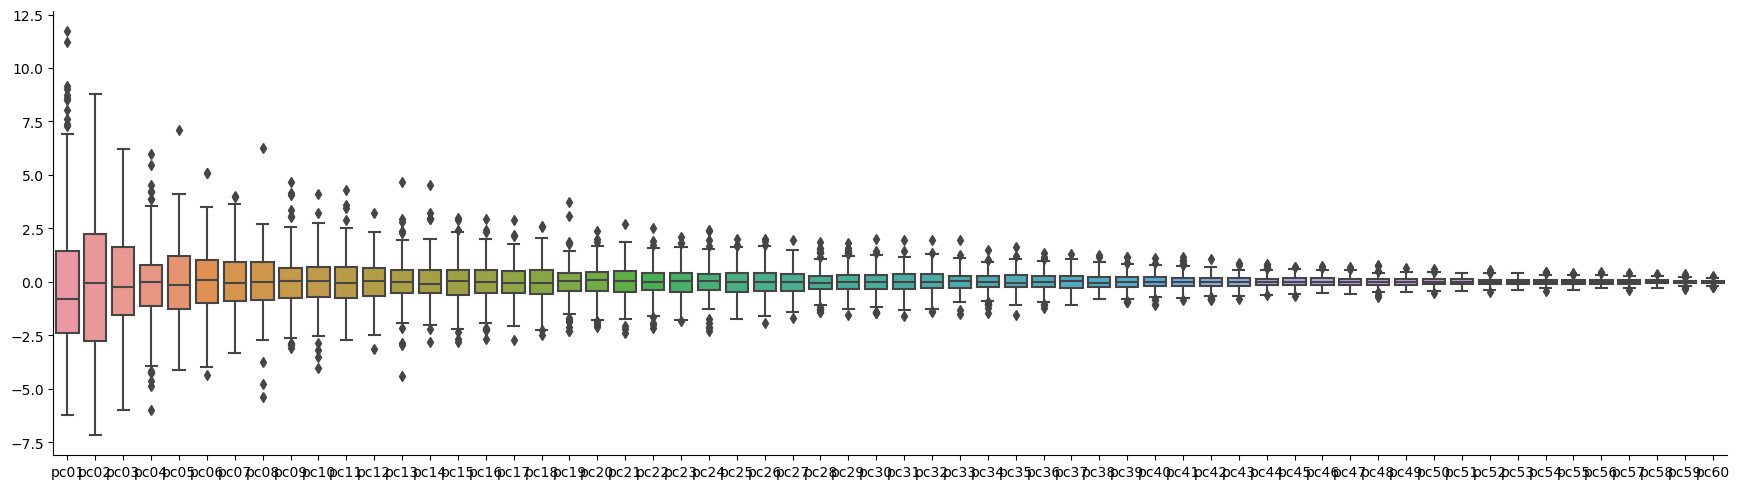

In [26]:
sns.catplot(data = sonar_pca_df, kind='box', aspect=3.5)

plt.show()

Let's use the `.describe()` method to look at the values of the summary statistics.

In [28]:
sonar_pca_df.describe().round(3)

,pc01,pc02,pc03,pc04,pc05,pc06,pc07,pc08,pc09,pc10,...,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
count,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000
mean,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,...,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000
std,3.502,3.375,2.270,1.850,1.737,1.565,1.406,1.355,1.244,1.226,...,0.171,0.169,0.152,0.149,0.139,0.128,0.122,0.108,0.106,0.081
min,-6.221,-7.168,-5.974,-5.976,-4.127,-4.364,-3.312,-5.386,-3.103,-4.013,...,-0.409,-0.481,-0.404,-0.414,-0.383,-0.310,-0.397,-0.284,-0.344,-0.240
25%,-2.394,-2.754,-1.564,-1.119,-1.273,-0.993,-0.890,-0.859,-0.737,-0.690,...,-0.118,-0.103,-0.110,-0.084,-0.107,-0.090,-0.085,-0.078,-0.058,-0.046
50%,-0.806,-0.047,-0.255,0.001,-0.146,0.064,-0.068,-0.030,0.034,0.031,...,0.003,0.000,0.009,0.002,0.003,0.002,0.006,-0.012,0.000,0.004
75%,1.456,2.238,1.626,0.808,1.206,1.005,0.931,0.926,0.627,0.694,...,0.119,0.104,0.105,0.089,0.079,0.080,0.081,0.072,0.056,0.053
max,11.727,8.774,6.224,5.984,7.101,5.103,4.023,6.281,4.673,4.129,...,0.421,0.533,0.413,0.479,0.394,0.473,0.405,0.343,0.376,0.278


Visualize the standard deviation!

In [29]:
sonar_pca_df.describe().loc['std']

pc01    3.502415
pc02    3.375367
pc03    2.270413
pc04    1.850399
pc05    1.737458
pc06    1.565497
pc07    1.406023
pc08    1.355253
pc09    1.243790
pc10    1.225513
pc11    1.118563
pc12    1.070844
pc13    1.026280
pc14    0.963094
pc15    0.927802
pc16    0.905826
pc17    0.862753
pc18    0.839390
pc19    0.788323
pc20    0.768270
pc21    0.754443
pc22    0.731511
pc23    0.711589
pc24    0.681716
pc25    0.659735
pc26    0.647951
pc27    0.609103
pc28    0.566128
pc29    0.562450
pc30    0.546511
pc31    0.535819
pc32    0.512801
pc33    0.473867
pc34    0.450554
pc35    0.432673
pc36    0.427526
pc37    0.416476
pc38    0.383997
pc39    0.363776
pc40    0.355919
pc41    0.333572
pc42    0.308869
pc43    0.287138
pc44    0.275326
pc45    0.248871
pc46    0.239218
pc47    0.237829
pc48    0.206556
pc49    0.189185
pc50    0.177284
pc51    0.171398
pc52    0.169086
pc53    0.152103
pc54    0.148690
pc55    0.139306
pc56    0.127642
pc57    0.121896
pc58    0.107941
pc59    0.1062

Use Pandas plotting methods to show the standard deviation vs the PC number.

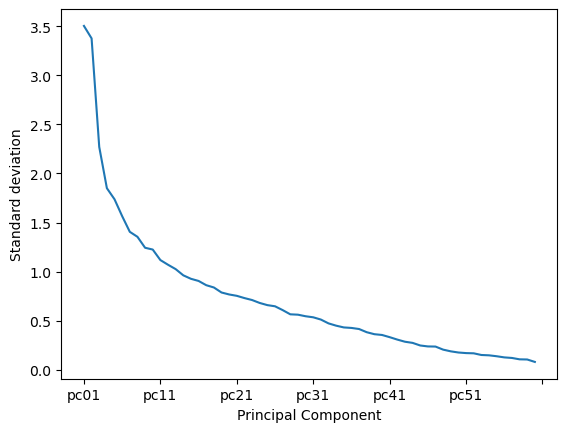

In [31]:
fig, ax = plt.subplots()

sonar_pca_df.describe().loc[ 'std' ].plot(ax=ax)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Standard deviation')

plt.show()

The LOW NUMBERED PCs have GREATER variation than the HIGHER NUMBERED PCs!!!!

This is by design!

PCA CREATES the new variables such that PC01 has the HIGHEST variation. 

Then, PCA creates PC02 to have the NEXT highest variation.

Then, PCA creates PC03 to have the NEXT highest variation.

So on and so on, the variation decreases for each subsequent PC!!!!!

The maximum number of PCs equals the number of columns in the data!!!!

One more important aspect of the PCs!!!

We previously saw that the original 60 numeric columns were correlated.

Let's check the correlation structure of the newly created PCs.

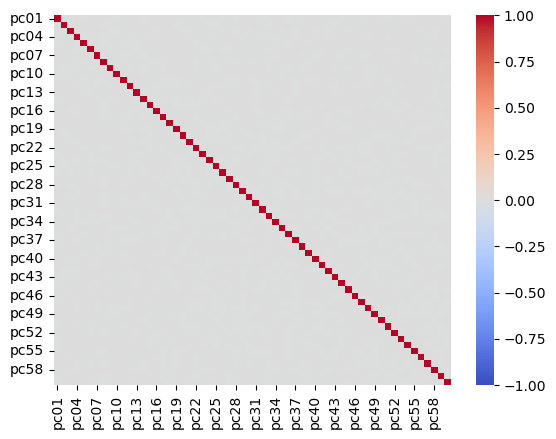

In [33]:
fig, ax = plt.subplots()

sns.heatmap(data = sonar_pca_df.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm',
            ax=ax)

plt.show()

PCA is created such that the NEW variables are UNCORRELATED!!!!!

PCA is created such that the LOW NUMBERED PCs have the HIGHEST variation while the HIGHEST numbered PCs have the LOWEST VARIATION!!!

But ALL PCs are UNCORRELATED!!!!

## Why does this matter?

We have used the FIRST TWO PCs to help our visualizations.

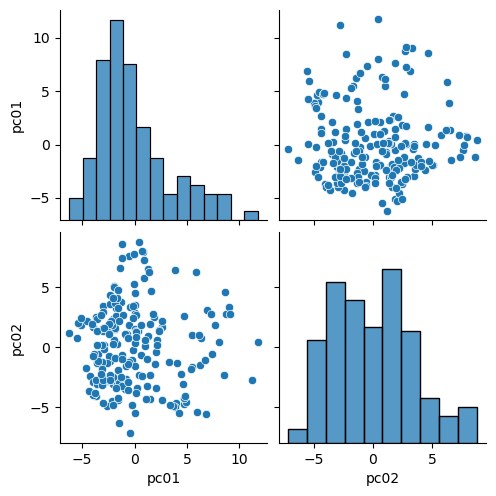

In [34]:
sns.pairplot(data = sonar_pca_df.iloc[:, :2])

plt.show()

But...we now know there are MORE PCs!!!!

We could consider exploring MORE PCs than just the first 2!!!

This is helpful when there are dozens if not hundreds of variables in the data and those variables have some kind of correlation structure!

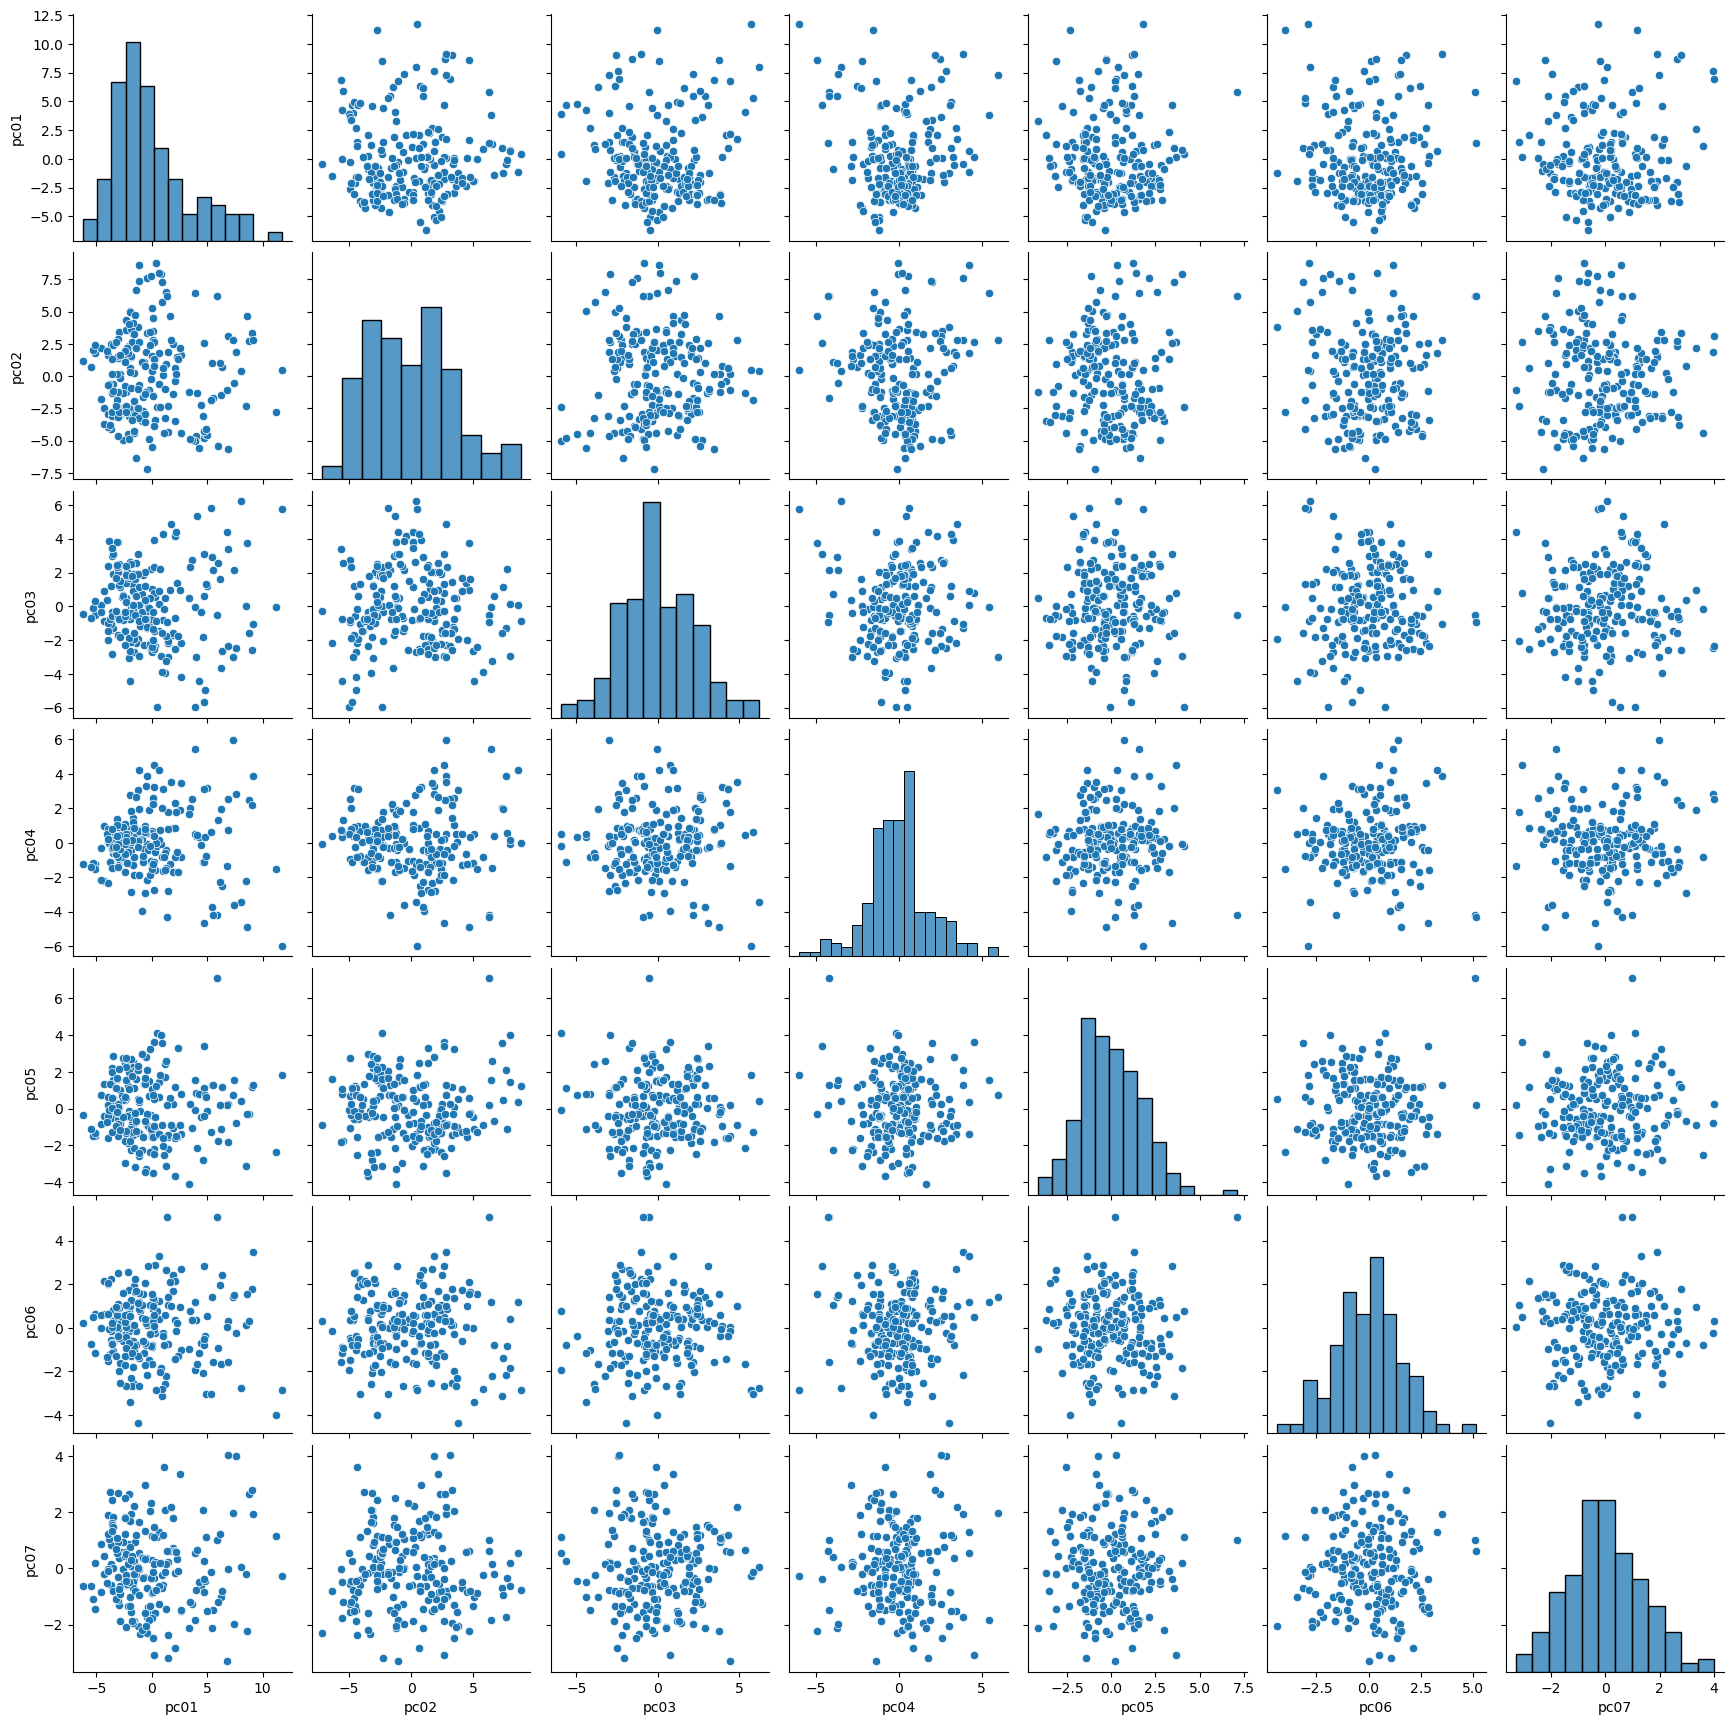

In [35]:
sns.pairplot(data = sonar_pca_df.iloc[:, :7])

plt.show()

You can also group or condition PCs by categorical variables!

In [36]:
sonar_pca_df['X60'] = sonar_df.X60

In [37]:
sonar_pca_df.dtypes

pc01    float64
pc02    float64
pc03    float64
pc04    float64
pc05    float64
         ...   
pc57    float64
pc58    float64
pc59    float64
pc60    float64
X60      object
Length: 61, dtype: object

Let's first use pairs plot to show the CONDITIONAL KDE and conditional scatter plot between the PAIRS of PCs GIVEN `X60`.

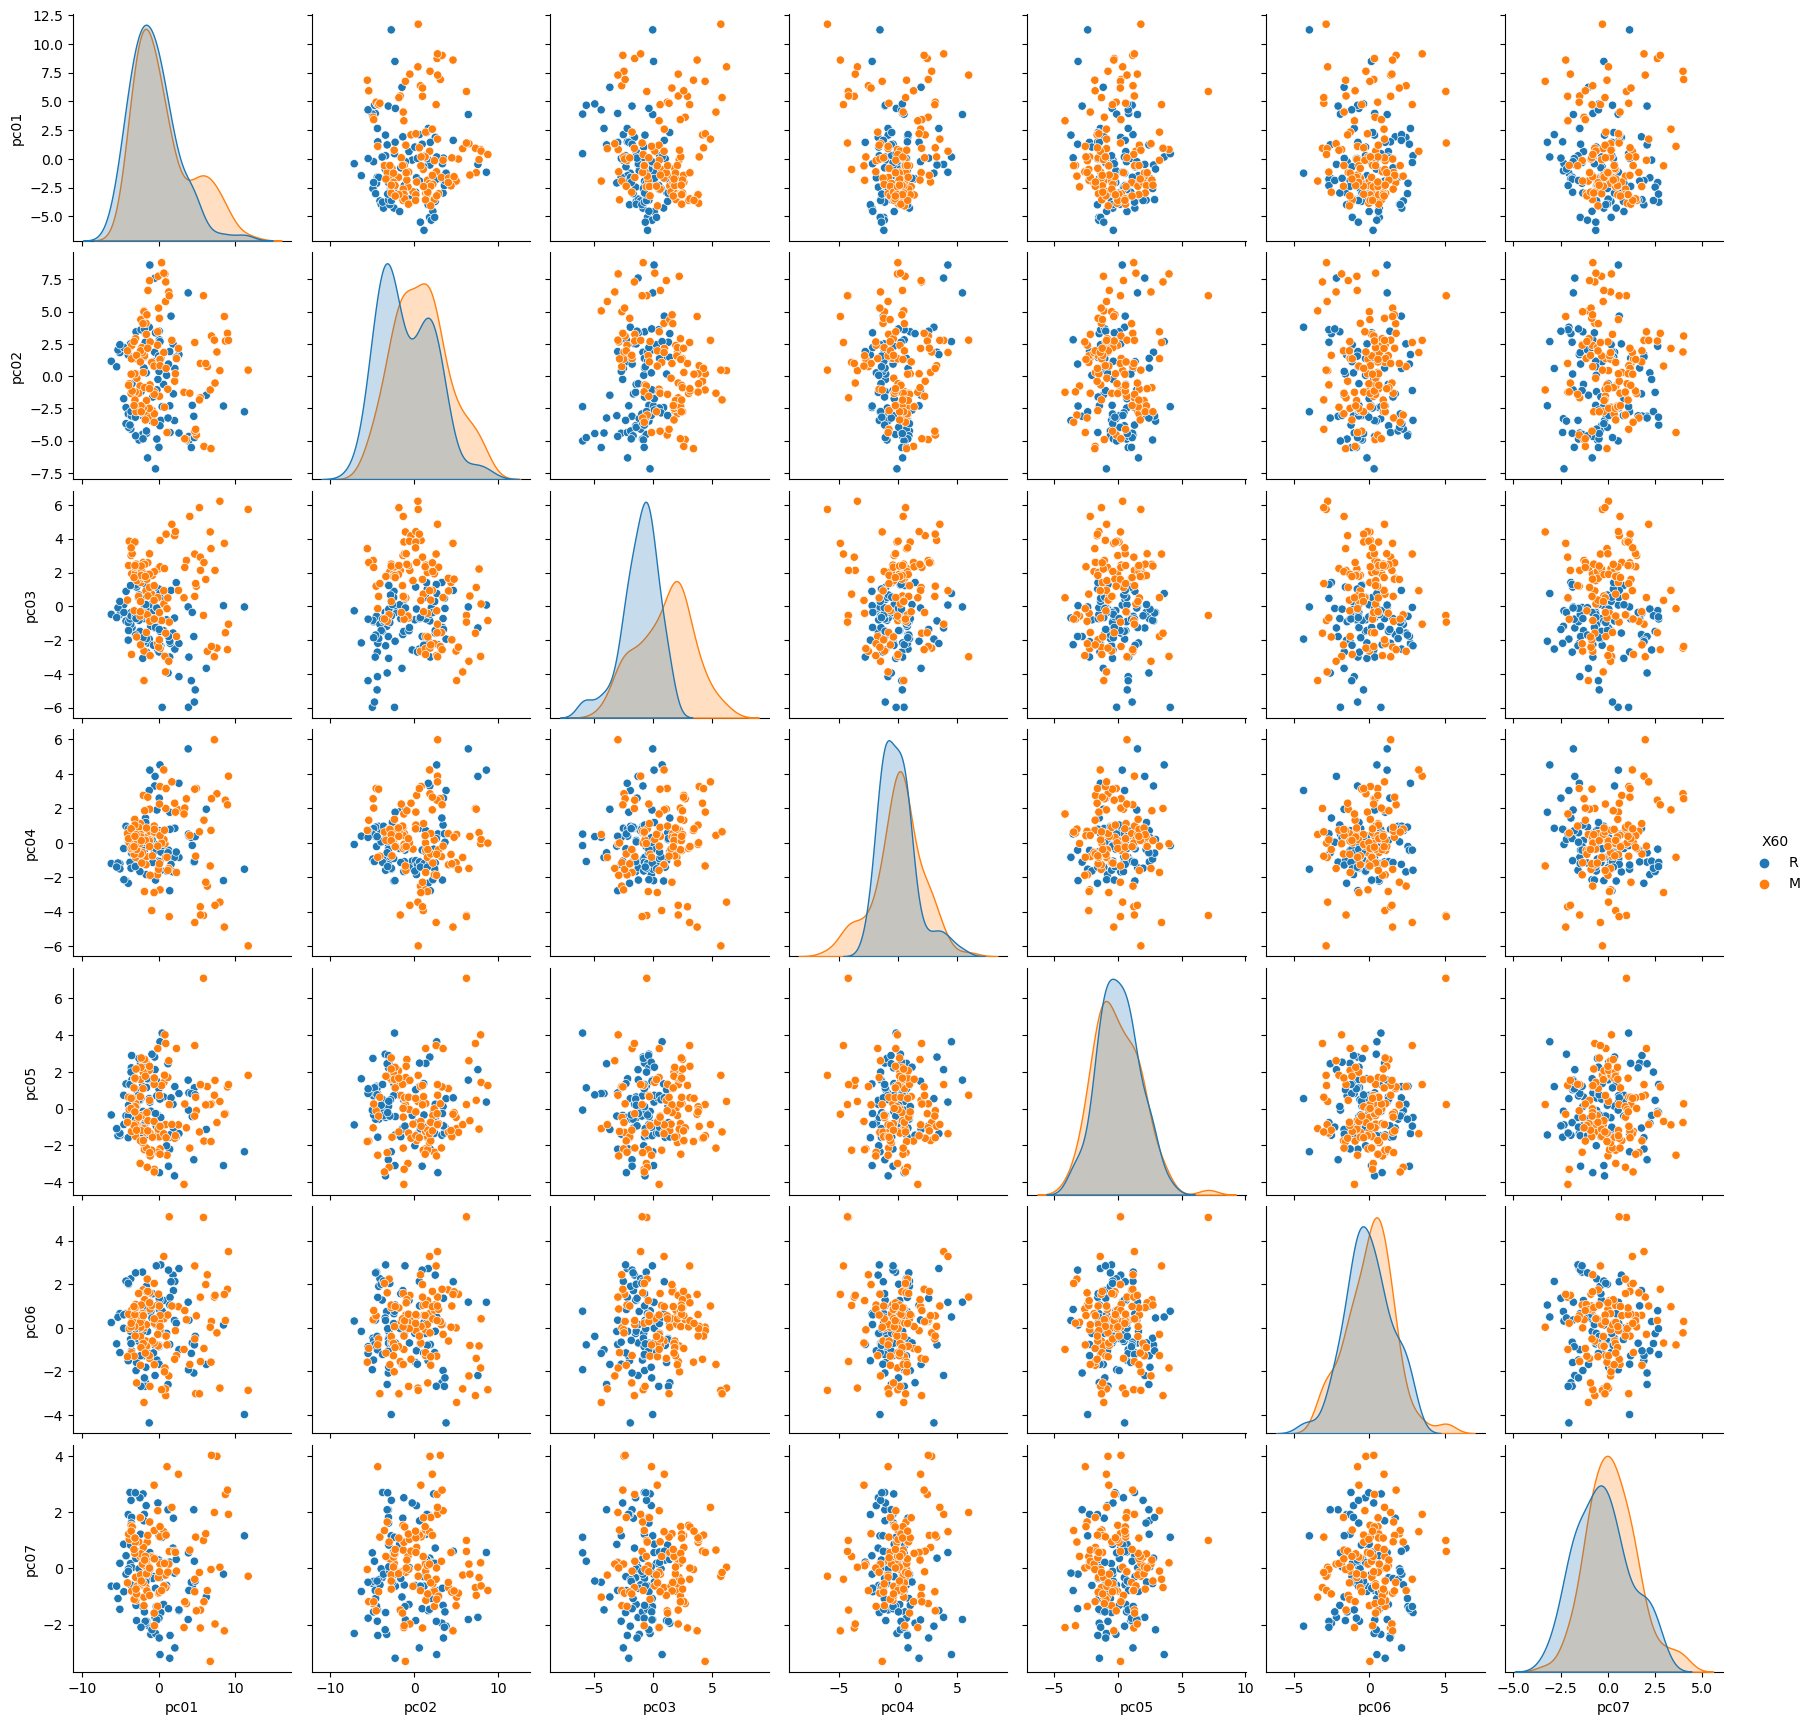

In [38]:
sns.pairplot(data = sonar_pca_df,
             vars=['pc%02d' % d for d in range(1, 7+1)],
             hue='X60',
             diag_kws={'common_norm': False})

plt.show()